In [47]:
import numpy as np
import re
from matplotlib import pyplot as plt

In [75]:
def cvt_local2global(local_point, sc_point):
    x, y, a = local_point.T
    X, Y, A = sc_point.T
    x1 = x * np.cos(A) - y * np.sin(A) + X
    y1 = x * np.sin(A) + y * np.cos(A) + Y
    a1 = (a + A) % (2 * np.pi)
    return np.array([x1, y1, a1]).T


def cvt_global2local(global_point, sc_point):
    x, y, a = global_point.T
    X, Y, A = sc_point.T
    x1 = x * np.cos(A) + y * np.sin(A) - X * np.cos(A) - Y * np.sin(A)
    y1 = -x * np.sin(A) + y * np.cos(A) + X * np.sin(A) - Y * np.cos(A)
    a1 = (a - A) % (2 * np.pi)
    return np.array([x1, y1, a1]).T

def find_src(global_point, local_point):
    x, y, a = local_point.T
    x1, y1, a1 = global_point.T
    A = (a1 - a) % (2 * np.pi)
    X = x1 - x * np.cos(A) + y * np.sin(A)
    Y = y1 - x * np.sin(A) - y * np.cos(A)
    return np.array([X, Y, A]).T

# Read file

In [42]:
file = open("stm_log/some_test_log", 'r')

In [43]:
times = []
cmds = []
responses = []
for line in file:
    if line[:12] == "New response":
        times.append(float(line[13:]))
    elif line[:4] == "cmd:":
        m = re.match("(.*) \[(.*)\]", line[4:])
        cmd = int(m.group(1))
        if "," in line[4:]:
            args = [float(x) for x in m.group(2).split(",")]
        else:
            args = [float(x) for x in m.group(2).split()]
        cmds.append([cmd] + args)
    elif line[:6] == "return":
        responses.append([float(x) for x in line[8:-2].split(",") if len(x) > 0])

# Odometry coords

In [61]:
time_coords = np.array([t for t, cmd in zip(times, cmds) if cmd[0] == 15])
raw_coords = np.array([x for x, cmd in zip(responses, cmds) if cmd[0] == 15])
time_coords -= time_coords[0]

(16, 18)

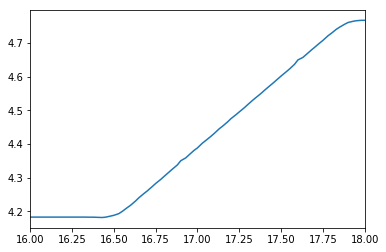

In [60]:
plt.plot(time_coords, coords[:, 2])
plt.xlim(16, 18)

In [101]:
rate = 20
points = np.zeros((int(time_coords[-1] * rate) + 1, 3))
for x, t in zip(raw_coords, time_coords):
    points[int(t * rate), :] = x

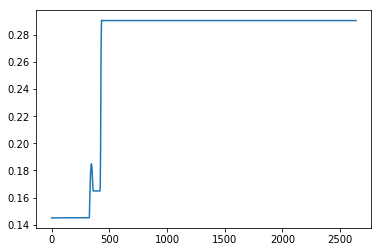

In [102]:
plt.plot(points[:, 0])

## Delta coords

In [103]:
delta_coords = cvt_global2local(points, np.roll(points, 1, axis=0))
delta_coords[0] = np.array([0, 0, 0])
delta_coords[-1] = np.array([0, 0, 0])

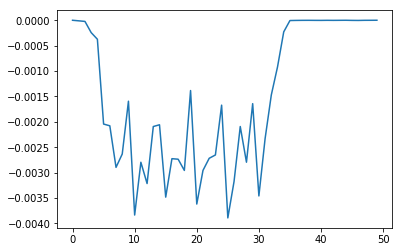

In [107]:
plt.plot(delta_coords[325:375, 1])